### <font color="magenta"> Get Data

In [88]:
import pandas as pd

In [89]:
import sqlite3

In [90]:
#billboard = pd.read_csv("../charts.csv")

#below is my path - kate
billboard = pd.read_csv("charts.csv")

In [91]:
billboard

,rank,song,artist,last-week,peak-rank,weeks-on-board,date
0,1,Butter,BTS,1.0,1,7,2021-07-17
1,2,Good 4 U,Olivia Rodrigo,2.0,1,8,2021-07-17
2,3,Levitating,Dua Lipa Featuring DaBaby,4.0,2,40,2021-07-17
3,4,Kiss Me More,Doja Cat Featuring SZA,3.0,3,13,2021-07-17
4,5,Montero (Call Me By Your Name),Lil Nas X,8.0,1,15,2021-07-17
...,...,...,...,...,...,...,...
328482,96,Over And Over,Thurston Harris,NaN,96,1,1958-08-04
328483,97,I Believe In You,Robert & Johnny,NaN,97,1,1958-08-04
328484,98,Little Serenade,The Ames Brothers,NaN,98,1,1958-08-04
328485,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1,1958-08-04


In [92]:
#con = sqlite3.connect("../database.sqlite")
con = sqlite3.connect("database.sqlite")

# Load the data into a DataFrame
reviews_df = pd.read_sql_query("SELECT * from reviews", con)

# Select only data for 2002
#surveys2002 = surveys_df[surveys_df.year == 2002]

# Write the new DataFrame to a new SQLite table
#surveys2002.to_sql("surveys2002", con, if_exists="replace")

con.close()

In [93]:
reviews_df

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18389,1341,1999,cassius,http://pitchfork.com/reviews/albums/1341-1999/,4.8,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18390,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999
18391,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,None,1999-01-12,1,12,1,1999


### <font color="magenta"> Clean data to merge

**In this section, we applied functions lower and trip to the artist and song title columns to ensure we may match songs and artists appropriately, without missing any data**

In [94]:
billboard['artist'] = billboard['artist'].apply(str.lower)
billboard['artist'] = billboard['artist'].apply(str.strip)
reviews_df['artist'] = reviews_df['artist'].apply(str.lower)
reviews_df['artist'] = reviews_df['artist'].apply(str.strip)

In [95]:
billboard['song'] = billboard['song'].apply(str.lower)
billboard['song'] = billboard['song'].apply(str.strip)
reviews_df['title'] = reviews_df['title'].apply(str.lower)
reviews_df['title'] = reviews_df['title'].apply(str.strip)

### <font color="magenta"> Merge

**Here we performed an inner merge on the reviews_df (pitchfork data) and billboard df (billboard data). The merged dataframe is titled merge.**

In [96]:
merge = reviews_df.merge(billboard, left_on = "title", right_on="song", how="inner")
merge['artist'] = merge['artist_y']
merge = merge.drop(['artist_x', 'artist_y','title','author_type'], axis=1)

In [97]:
merge

,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year,rank,song,last-week,peak-rank,weeks-on-board,date,artist
0,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016,29,4 your eyez only,NaN,29,1,2016-12-31,j. cole
1,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016,81,out of time,85.0,81,3,1975-09-06,the rolling stones
2,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016,85,out of time,90.0,85,2,1975-08-30,the rolling stones
3,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016,90,out of time,NaN,90,1,1975-08-23,the rolling stones
4,19985,http://pitchfork.com/reviews/albums/19985-houn...,6.8,0,paul thompson,2014-11-26,2,26,11,2014,81,out of time,85.0,81,3,1975-09-06,the rolling stones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22784,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999,72,californication,NaN,72,1,2000-07-29,red hot chili peppers
22785,7119,http://pitchfork.com/reviews/albums/7119-dna/,8.0,0,samir khan,1999-05-04,1,4,5,1999,98,dna,87.0,67,4,2017-10-28,bts
22786,7119,http://pitchfork.com/reviews/albums/7119-dna/,8.0,0,samir khan,1999-05-04,1,4,5,1999,87,dna,67.0,67,3,2017-10-21,bts
22787,7119,http://pitchfork.com/reviews/albums/7119-dna/,8.0,0,samir khan,1999-05-04,1,4,5,1999,67,dna,85.0,67,2,2017-10-14,bts


### <font color="magenta"> Change column order to read easier

**To make merge more readable and easier to manipulate, we changed the order of the columns below**

In [98]:
cols = list(merge.columns.values)

In [99]:
cols

['reviewid',
 'url',
 'score',
 'best_new_music',
 'author',
 'pub_date',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year',
 'rank',
 'song',
 'last-week',
 'peak-rank',
 'weeks-on-board',
 'date',
 'artist']

In [100]:
cols =  ['date',
 'rank',
 'song','artist',
 'last-week',
 'peak-rank',
 'weeks-on-board',
 'reviewid',
 'url',
 'score',
 'best_new_music',
 'author',
 'pub_date',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year']

In [101]:
merge = merge[cols]

In [102]:
#merge['url'].value_counts()

#The line below shows why the same url shows up 205 times. The review is for an album called angel and the song titles are called angel
merge[merge['url']=='http://pitchfork.com/reviews/albums/19174-pure-x-angel/']

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
7385,2013-12-28,87,angel,jacquie lee,NaN,87,1,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7386,2011-07-02,64,angel,javier colon,NaN,64,1,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7387,2011-05-14,83,angel,akon,96.0,56,10,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7388,2011-05-07,96,angel,akon,NaN,56,9,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7389,2010-12-25,83,angel,akon,56.0,56,8,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,1965-03-13,53,angel,johnny tillotson,60.0,53,5,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7586,1965-03-06,60,angel,johnny tillotson,66.0,60,4,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7587,1965-02-27,66,angel,johnny tillotson,82.0,66,3,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7588,1965-02-20,82,angel,johnny tillotson,94.0,82,2,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014


### <font color="magenta"> Drop duplicate reviews (if they have same url)

not sure why there are so many duplicates, might want to check if different reviews go to same URL.

In [103]:
merge.drop_duplicates(subset=['url'],keep='last')

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,2016-12-31,29,4 your eyez only,j. cole,NaN,29,1,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016
3,1975-08-23,90,out of time,the rolling stones,NaN,90,1,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016
6,1975-08-23,90,out of time,the rolling stones,NaN,90,1,19985,http://pitchfork.com/reviews/albums/19985-houn...,6.8,0,paul thompson,2014-11-26,2,26,11,2014
47,2016-10-29,5,24k magic,bruno mars,NaN,5,1,22634,http://pitchfork.com/reviews/albums/22634-24k-...,6.2,0,katherine st. asaph,2016-12-02,4,2,12,2016
77,2016-10-08,40,starboy,the weeknd featuring daft punk,NaN,40,1,22668,http://pitchfork.com/reviews/albums/22668-star...,6.7,0,mehan jayasuriya,2016-11-30,2,30,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22723,2020-05-02,44,pick up,dababy featuring quavo,NaN,44,1,7323,http://pitchfork.com/reviews/albums/7323-pick-up/,7.6,0,s. murray,1999-09-14,1,14,9,1999
22761,1961-02-20,24,surrender,elvis presley with the jordanaires,NaN,24,1,1412,http://pitchfork.com/reviews/albums/1412-surre...,9.0,0,sarah zupko,1999-06-29,1,29,6,1999
22765,2020-11-14,92,stay down,"lil durk, 6lack & young thug",NaN,92,1,8224,http://pitchfork.com/reviews/albums/8224-stay-...,9.3,0,paul cooper,1999-06-22,1,22,6,1999
22784,2000-07-29,72,californication,red hot chili peppers,NaN,72,1,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999


### <font color="magenta"> Checking number of unique songs in merge

**The new dataframe unique has 693 rows of completely different songs (previously, a song may have appeared in multiple rows if it lived on the Billboard charts for multiple weeks or if it had multiple reviews**

In [104]:
unique = merge.drop_duplicates(subset ="song")

In [105]:
unique

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,2016-12-31,29,4 your eyez only,j. cole,NaN,29,1,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016
1,1975-09-06,81,out of time,the rolling stones,85.0,81,3,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016
7,2017-08-05,50,24k magic,bruno mars,48.0,4,41,22634,http://pitchfork.com/reviews/albums/22634-24k-...,6.2,0,katherine st. asaph,2016-12-02,4,2,12,2016
48,2017-04-29,39,starboy,the weeknd featuring daft punk,37.0,1,30,22668,http://pitchfork.com/reviews/albums/22668-star...,6.7,0,mehan jayasuriya,2016-11-30,2,30,11,2016
78,2021-07-10,88,woman,doja cat,NaN,88,1,22644,http://pitchfork.com/reviews/albums/22644-woman/,5.2,0,mehan jayasuriya,2016-11-29,1,29,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22723,2020-05-02,44,pick up,dababy featuring quavo,NaN,44,1,7323,http://pitchfork.com/reviews/albums/7323-pick-up/,7.6,0,s. murray,1999-09-14,1,14,9,1999
22724,1991-08-10,96,surrender,trixter,84.0,72,10,1412,http://pitchfork.com/reviews/albums/1412-surre...,9.0,0,sarah zupko,1999-06-29,1,29,6,1999
22762,2021-02-13,87,stay down,"lil durk, 6lack & young thug",NaN,73,4,8224,http://pitchfork.com/reviews/albums/8224-stay-...,9.3,0,paul cooper,1999-06-22,1,22,6,1999
22766,2000-12-02,97,californication,red hot chili peppers,89.0,69,19,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999


### <font color="magenta"> Starting to look at scores by song

**Here we performed a groupby on the database merge (with duplicates of songs), in order to see the number of times a song recieved reviews on Pitchfork and what it's average score was**

In [106]:
groups = merge.groupby("song")

In [107]:
groups["score"].value_counts()

song                score
#1                  4.9      20
1-2-3               6.1      39
18                  2.6       1
19                  7.9      14
1999                4.8      30
                             ..
you should be here  7.4      20
young americans     8.7      11
young forever       3.4      25
youth               4.9      20
yuck                8.1       1
Name: score, Length: 845, dtype: int64

### <font color="magenta"> Data frame of songs that have reviews but have not been on the Billboard "Top 100"

**By creating this dataframe, nottop, we may analyze the average review score for songs that were not popular enough to make it to Billboard's Top 100 list**

In [108]:
nottop = reviews_df[~reviews_df['title'].isin(billboard['song'])]

In [109]:
nottop = nottop.drop_duplicates(subset=['url'],keep='last')

In [110]:
nottop

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18387,6372,cd 2,pole,http://pitchfork.com/reviews/albums/6372-cd-2/,7.2,0,mark richard-san,None,1999-02-01,0,1,2,1999
18388,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18390,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999
18391,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,None,1999-01-12,1,12,1,1999


In [111]:
group = nottop.groupby("title")

In [112]:
group["score"].value_counts()

title             score
                  5.0      1
                  8.4      1
"cassette" ep     7.8      1
"couples"         5.8      1
"evidence" 12"    7.6      1
                          ..
zummo with an x   8.0      1
zwei              7.3      1
zwei photonen ep  8.0      1
zweite meer       6.9      1
{awayland}        5.5      1
Name: score, Length: 17502, dtype: int64

### <font color="magenta"> Starting the graphs

**Our first visual is a scatter plot comparing the average review score of songs both on the Billboard chart and not on the Billboard chart(from Pitchfork) and their peak-rank, as taken from Billbaord data**

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
rating_top = unique.score.to_list()
rating_nottop = nottop.score.to_list()

In [115]:
billboard_rank = unique['peak-rank'].to_list()

In [116]:
title_top = unique.song.to_list()
title_nottop = nottop.title.to_list()

In [117]:
unique.score.mean()

6.9731601731601724

Text(0, 0.5, 'Billboard Peak Rank')

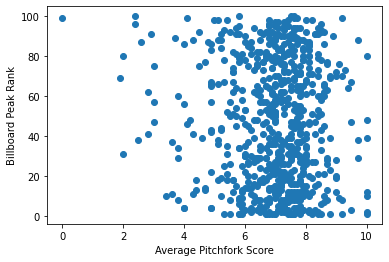

In [118]:
plt.scatter(x= rating_top, y = billboard_rank)
plt.xlabel('Average Pitchfork Score')
plt.ylabel('Billboard Peak Rank')

### <font color="magenta"> the majority of billboard hot 100 songs are rank at 6.97 with no apparent positive or negative trend between rating and location on the billboard hot 100

### <font color="magenta"> Second visualization

**Our secondary goal is to compare song review sentiment scores from songs on “The Hot 100” list using a histogram. The histogram would have the sentiment score on the x-axis from positive to negative. This would be interesting to see if popular songs are reviewed more positively or if the reviews are polarized.**

In [119]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import requests
import json

In [120]:
sid = SentimentIntensityAnalyzer()

In [136]:
def scrape_review_text(url):
    response = requests.get(url)
    #response_dict = json.loads(response.text)
    soup = BeautifulSoup(response.text)
    paragraph = soup.find('meta', { 'name': "description" })
    return str(paragraph)
#trial = scrape_review_text('http://pitchfork.com/reviews/albums/22669-out-of-time/')

In [132]:
trial

'<meta content="Along with Nevermind, released a half year later, R.E.M.’s\xa0Out of Time\xa0was the early-’90s major-label ideal: A\xa0blockbuster that multiplied the band’s following without losing existing fans." data-react-helmet="true" name="description" property="description"/>'

In [ ]:
#the line below takes SO long I think we should just do polarity scores of blurbs
#I can't get line below to work

In [ ]:
article_body_df = unique['url'].apply(scrape_review_text)

In [ ]:
def apply_sentiment(column):
    ss = sid.polarity_scores(column)
    return ss
#article_body_df.apply(apply_sentiment)

In [ ]:
#final_neg = sorted(d.items(), key = lambda x:x[1]['neg'], reverse=True)
#final_pos = sorted(d.items(), key = lambda x:x[1]['pos'], reverse=True)

In [ ]:
#make df of article body texts, perform the sentiment analysis, sort them, make visual
article_body_df